# <center>Histogram（直方图）&KDE（密度图)    Chizx 2021/03/15</center>

<h2>0 Pandas数据集的导入</h2>

<b3><b>0.1 pandas导入csv/txt文件</b></b3>

pd.read_csv()

常用参数：

例1：导入文件house-price-index-full-table.csv中数据：

In [2]:
import pandas as pd
df1=pd.read_csv("Data/house-price-index-full-table.csv")
#df1=pd.read_csv("Data/house-price2.csv",encoding='gbk')
df1.head()

,Quarter,Quarter Start Date,House Price Index (non seasonally adjusted),House Price Index (seasonally adjusted),Average price 1-bedroom flats,Average price 2-bedroom flats,Average price 2-bedroom houses,Average price 3-bedroom houses,Average price 4-bedroom houses
0,Q1 2002,01/01/2002,96.9,99.4,166,213,265,332,416
1,Q2 2002,01/04/2002,98.7,98.3,160,268,268,314,432
2,Q3 2002,01/07/2002,103.4,101.7,160,259,284,332,474
3,Q4 2002,01/10/2002,101.0,100.9,137,242,300,333,459
4,Q1 2003,01/01/2003,95.0,97.2,156,216,285,328,380


In [8]:
df2=pd.read_csv("Data/house-price2.csv",usecols=[0,1,2],nrows=5,encoding='gbk')
df2

,Quarter,Quarter Start Date,House Price Index (non seasonally adjusted)
0,Q1 2002,01/01/2002,96.9
1,Q2 2002,01/04/2002,98.7
2,Q3 2002,01/07/2002,103.4
3,Q4 2002,01/10/2002,101.0
4,Q1 2003,01/01/2003,95.0


例2：导入文件data.txt中数据：

In [5]:
df3=pd.read_csv("Data/data.txt",sep='\t',header=None,names=['特征1','特征2','特征3','标签'])
df3

,特征1,特征2,特征3,标签
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1
5,72993,10.141740,1.032955,1
6,35948,6.830792,1.213192,3
7,42666,13.276369,0.543880,3
8,67497,8.631577,0.749278,1
9,35483,12.273169,1.508053,3


<b3><b>0.2 pandas导入excel文件</b></b3>

pd.read_excel()

常用参数：

例：读取Canada.xlsx文件中的数据

In [70]:
df_canada=pd.read_excel("Data/Canada.xlsx",sheet_name='Canada by Citizenship',skiprows=20,skip_footer=2)
df_canada.head()
df_India_China=df_canada[df_canada['OdName'].isin(['China','India'])]

In [99]:
df_India_China.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [102]:
df_India_China

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
36,Immigrants,Foreigners,China,935,Asia,906,Eastern Asia,902,Developing regions,5123,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
79,Immigrants,Foreigners,India,935,Asia,5501,Southern Asia,902,Developing regions,8880,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


选取等于某些值的行记录 用 ==

df.loc[df[‘column_name’] == some_value]
 
选取某列是否是某一类型的数值 用 isin

df.loc[df[‘column_name’].isin(some_values)]


df['a']#取a列

df[['a','b']]#取a、b列

<h2>1 直方图及密度图的画法</h2>

直方图是表示变量频率分布的一种方法，是一个可以快速展示数据概率分布的工具，直观易于理解，并深受数据爱好者的喜爱。大家平时可能见到最多就是 matplotlib，seaborn 等高级封装的库包。<br/><br/>

直方图又称质量分布图，它是表示资料变化情况的一种主要工具。用直方图可以解析出资料的规则性，比较直观地看出产品质量特性的分布状态，对于资料分布状况一目了然，便于判断其总体质量分布情况。直方图表示通过沿数据范围形成分箱(bin)，然后绘制条以显示落入每个分箱的观测次数的数据分布。

核密度图（kde直方图的拟合曲线）可以看作是概率密度图

<b3><b>1.1 matplotlib画直方图及密度图</b></b3>

<b>(1)plt.hist()
用于画直方图。</b>

参数列表：

返回值：

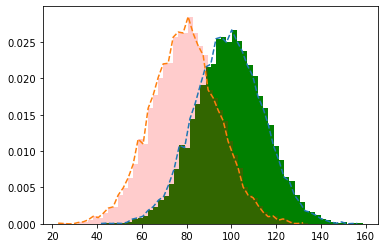

In [17]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19260801)

mu1, sigma1 = 100, 15
mu2, sigma2 = 80, 15
x1 =  np.random.normal(mu1,sigma1,10000) # (均值,方差/标准差,个数)
x2 =  np.random.normal(mu2,sigma2,10000) 

# the histogram of the data
# 50：将数据分成50组
# color：颜色；alpha：透明度
# density：是密度而不是具体数值，是否对数据进行归一化
n1, bins1, patches1 = plt.hist(x1, bins=50, density=True,color='g', alpha=1)
n2, bins2, patches2 = plt.hist(x2, bins=50, density=True,color='r', alpha=0.2)

plt.plot(bins1[:-1],n1,'--')
plt.plot(bins2[:-1],n2,'--')
# plt.show()

<b>(2)添加分布曲线</b>

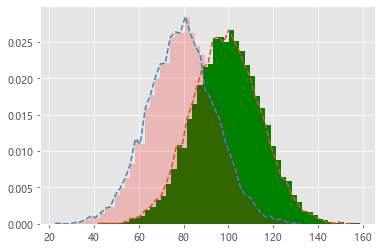

In [126]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19260801)

mu1, sigma1 = 100, 15
mu2, sigma2 = 80, 15
x1 =  np.random.normal(mu1,sigma1,10000) # (均值,标准差,个数)
x2 =  np.random.normal(mu2,sigma2,10000) 

# the histogram of the data
# 50：将数据分成50组
# color：颜色；alpha：透明度
# density：是密度而不是具体数值
n1, bins1, patches1 = plt.hist(x1, bins=50,  density=True, color='g', alpha=1)
n2, bins2, patches2 = plt.hist(x2, bins=50,  density=True, color='r', alpha=0.2)


plt.plot(bins1[:-1],n1,'--')
plt.plot(bins2[:-1],n2,'--')
plt.show()

<b>(3)多类型直方图</b>

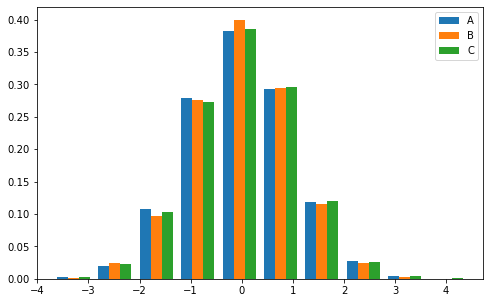

In [19]:
import numpy as np
import matplotlib.pyplot as plt

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)      

# 生成3组值，每组的个数可以不一样
x1,x2,x3 = [np.random.randn(n) for n in [10000, 5000, 2000]]

plt.figure(figsize=(8,5))
# 在 ax.hist 函数中先指定图例 label 名称
plt.hist([x1, x2, x3], bins=10, density=True, histtype='bar')
#plt.rcParams['font.family']='Times New Roman'
#plt.rcParams['axes.unicode_minus']=False

# 通过 ax.legend 函数来添加图例
plt.legend(list("ABC"))
plt.show()

<b>(4)添加说明信息</b>

<b>添加title</b><br/><br/>
你可以给图示或图添加标题。但是默认不支持中文，需要自己添加中文字体。

windows的字体文件放在 C:\Windows\Fonts，通过fontproperties设置字体，fontsize设置字体大小.

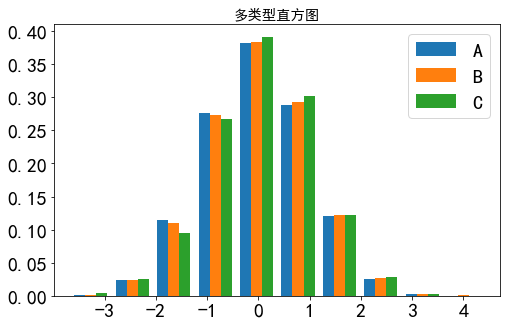

In [61]:
import numpy as np
import matplotlib.pyplot as plt

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)      

# 生成3组值，每组的个数可以不一样
x1,x2,x3 = [np.random.randn(n) for n in [10000, 5000, 2000]]

plt.figure(figsize=(8,5))
# 在 ax.hist 函数中先指定图例 label 名称
plt.hist([x1, x2, x3], bins=10, density=True, histtype='bar')

# 通过 ax.legend 函数来添加图例
plt.legend(list("ABC"))

plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.size']='12'
plt.title("多类型直方图")
#songTi = matplotlib.font_manager.FontProperties(fname='C:\\Windows\\Fonts\\msyh.ttc')
#plt.title("多类型直方图",fontproperties=songTi,fontsize=12)
plt.show()

<b>添加文字、网格、轴标签及轴范围</b>

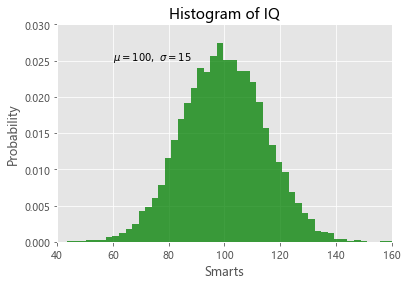

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, color='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')  #(x,y,str,...)r raw string 
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

<b3><b>1.2 pandas画直方图及密度图</b></b3>

<b>（1）pandas的plot方法</b>

pandas默认的 plot 方法可以帮助我们快速地绘制各种图形<br/>
Pandas 提供了 plot() 方法可以快速方便地将 Series 和 DataFrame 中的数据进行可视化, 它是 matplotlib.axes.Axes.plot 的封装。代码执行后会生成一张图片，并直接显示在 notebook 上。<br/>

<b>基本使用</b>

<b>使用方法</b>

<b>Series 使用</b>

使用 plot 时 x 轴为索引，y 轴为索引对应的具体值：

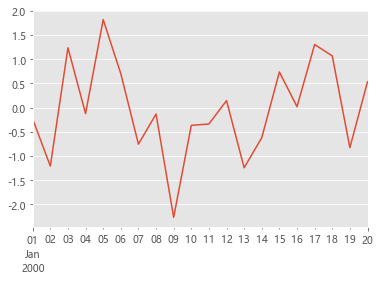

In [45]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/1/2000', periods=20)
              )

ts.plot()

<b>DataFrame 使用</b><br/>

DataFrame 使用 plot 时 x 轴为索引，y 轴为索引对应的多个具体值：

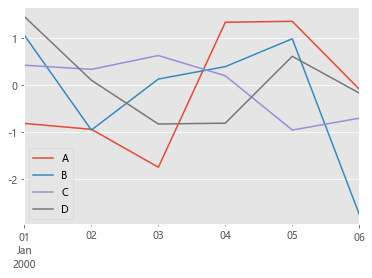

In [46]:
df = pd.DataFrame(np.random.randn(6, 4),
                  index=pd.date_range('1/1/2000', periods=6),
                  columns=list('ABCD'))
df.plot()

<b>plot 绘图时常用的一些绘图参数。</b><br/>

图形类型

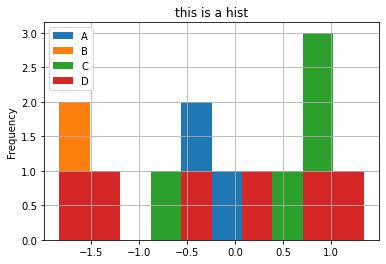

In [25]:
df = pd.DataFrame(np.random.randn(6, 4),
                  index=pd.date_range('1/1/2000', periods=6),
                  columns=list('ABCD'))
df.plot(kind='hist',title='this is a hist',grid=True)

图的标题：

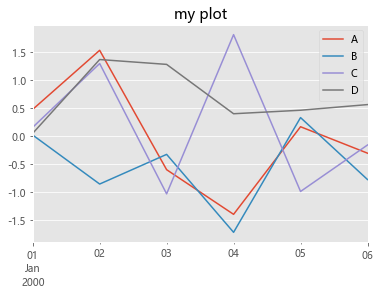

In [20]:
df.plot(title='my plot')

字体大小

In [ ]:
指定轴上的字体大小

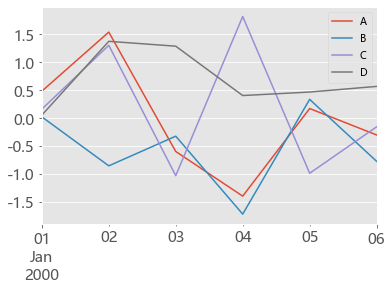

In [21]:
df.plot(fontsize=15)

线条样式

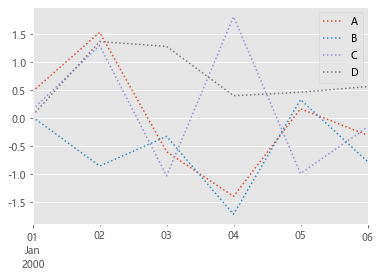

In [23]:
df.plot(style=':') # 虚线

对不同线分别给样式：

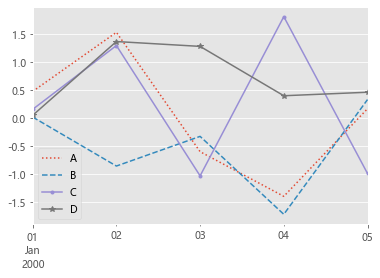

In [22]:
df[:5].plot(style=[':', '--', '.-', '*-'])

背景辅助线

In [ ]:
grid 会给 x 方向和 y 方向增加灰色辅助线：

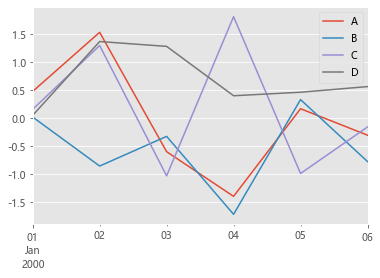

In [24]:
df.plot(grid=True)

图例

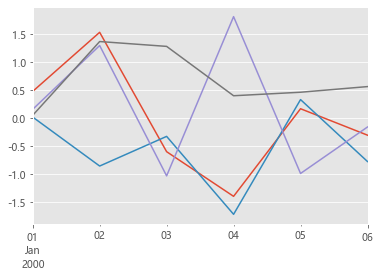

In [25]:
df.plot(legend=False)

可以反向排序图例：

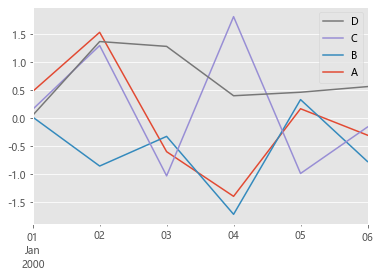

In [26]:
df.plot(legend='reverse')

<b>（2）Pandas画直方图和密度图</b>

<class 'pandas.core.series.Series'>


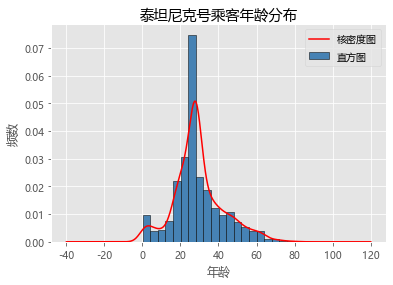

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
# 读入数据
Titanic = pd.read_csv('Data\Titanic.csv')
# 检查年龄是否有缺失
any(Titanic.Age.isnull())
# 不妨删除含有缺失年龄的观察
Titanic.dropna(subset=['Age'], inplace=True)
#设置绘图风格
plt.style.use('ggplot')
#处理中文乱码
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#坐标轴负号的处理
plt.rcParams['axes.unicode_minus']=False
# 绘制直方图
Titanic.Age.plot(kind = 'hist', bins = 20, color = 'steelblue', edgecolor = 'black', density = True, label = '直方图')
# 绘制核密度图
Titanic.Age.plot(kind = 'kde', color = 'red', label = '核密度图')
# 添加x轴和y轴标签
plt.xlabel('年龄')
plt.ylabel('频数')
# 添加标题
plt.title('泰坦尼克号乘客年龄分布')
# 显示图例
plt.legend()
# 显示图形
plt.show()

<b3><b>1.3 seaborn画直方图及密度图</b></b3>

尽管上一幅图满足了两种图形的合成，但其表达的是所有乘客的年龄分布，如果按性别分组，研究不同性别下年龄分布的差异，该如何实现？针对这个问题，使用matplotlib模块或pandas模块都会稍微复杂一些，推荐使用seaborn模块中的distplot函数，因为该函数的代码简洁而易懂。关于该函数的语法和参数含义如下：

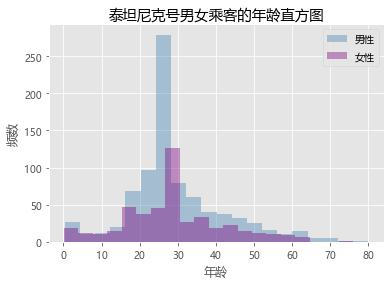

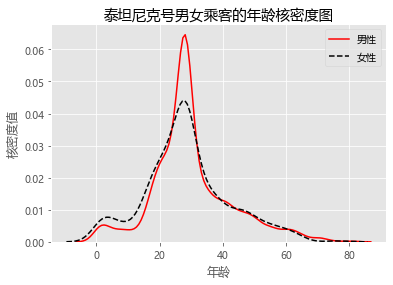

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 读入数据
Titanic = pd.read_csv(r'Data\Titanic.csv')
# 检查年龄是否有缺失
any(Titanic.Age.isnull())
# 不妨删除含有缺失年龄的观察
Titanic.dropna(subset=['Age'], inplace=True)
#设置绘图风格
plt.style.use('ggplot')
#处理中文乱码
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#坐标轴负号的处理
plt.rcParams['axes.unicode_minus']=False
# 取出男性年龄
Age_Male = Titanic.Age[Titanic.Sex == 0]
# 取出女性年龄
Age_Female = Titanic.Age[Titanic.Sex ==1]

# seaborn模块绘制分组的直方图和核密度图
# 绘制男女乘客年龄的直方图
sns.distplot(Age_Male, bins = 20, kde = False, hist_kws = {'color':'steelblue'}, label = '男性')
# 绘制女性年龄的直方图
sns.distplot(Age_Female, bins = 20, kde = False, hist_kws = {'color':'purple'}, label = '女性')
plt.title('泰坦尼克号男女乘客的年龄直方图')
plt.xlabel('年龄')
plt.ylabel('频数')
# 显示图例
plt.legend()
# 显示图形
plt.show()

# 绘制男女乘客年龄的核密度图
sns.distplot(Age_Male, hist = False, kde_kws = {'color':'red', 'linestyle':'-'},
             norm_hist = True, label = '男性')
# 绘制女性年龄的核密度图
sns.distplot(Age_Female, hist = False, kde_kws = {'color':'black', 'linestyle':'--'},
             norm_hist = True, label = '女性')
plt.title('泰坦尼克号男女乘客的年龄核密度图')
plt.xlabel('年龄')
plt.ylabel('核密度值')
# 显示图例
plt.legend()
# 显示图形
plt.show()

为了避免四个图形混在一起不易发现数据背后的特征，将直方图与核密度图分开绘制。从直方图来看，女性年龄的分布明显比男性矮，说明在各年龄段下，男性乘客要比女性乘客多；再看核密度图，男女性别的年龄分布趋势比较接近，说明各年龄段下的男女乘客人数同步增加或减少。

把两种图合在一起画：

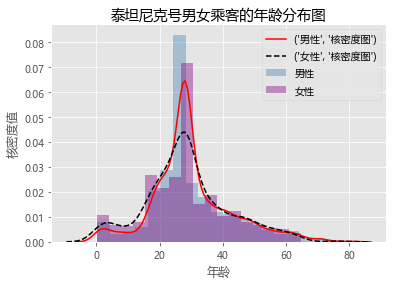

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 读入数据
Titanic = pd.read_csv(r'Data\Titanic.csv')
# 检查年龄是否有缺失
any(Titanic.Age.isnull())
# 不妨删除含有缺失年龄的观察
Titanic.dropna(subset=['Age'], inplace=True)
#设置绘图风格
plt.style.use('ggplot')
#处理中文乱码
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#坐标轴负号的处理
plt.rcParams['axes.unicode_minus']=False
# 取出男性年龄
Age_Male = Titanic.Age[Titanic.Sex == 0]
# 取出女性年龄
Age_Female = Titanic.Age[Titanic.Sex ==1]

# seaborn模块绘制分组的直方图和核密度图
# 绘制男女乘客年龄的直方图
sns.distplot(Age_Male, bins = 20, kde = False, hist_kws = {'color':'steelblue'},
             label = ('男性','直方图'),norm_hist=True)
# 绘制女性年龄的直方图
sns.distplot(Age_Female, bins = 20, kde = False, hist_kws = {'color':'purple'},
             label = ('女性','直方图'),norm_hist=True)

# 绘制男女乘客年龄的核密度图
sns.distplot(Age_Male, hist = False, kde_kws = {'color':'red', 'linestyle':'-'},
             norm_hist = True, label = ('男性','核密度图'))
# 绘制女性年龄的核密度图
sns.distplot(Age_Female, hist = False, kde_kws = {'color':'black', 'linestyle':'--'},
             norm_hist = True, label = ('女性','核密度图'))
plt.title('泰坦尼克号男女乘客的年龄分布图')
plt.xlabel('年龄')
plt.ylabel('核密度值')
# 显示图例
plt.legend()
# 显示图形
plt.show()

<b>（1）seaborn直方图</b>

seaborn的kdeplot函数专门用于画核密度估计图.

<b>（2）seaborn密度图</b>

seaborn的kdeplot函数专门用于画核密度估计图.

<h2>2 课堂练习</h2>

<b>（1）直方图</b>

以Titanic数据集为例绘制乘客的年龄直方图

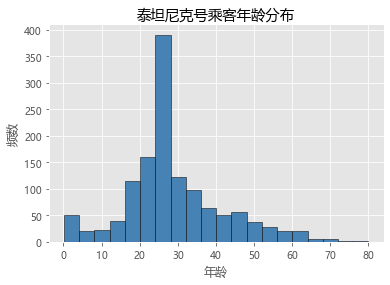

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
# 读入数据
Titanic = pd.read_csv(r'Data\Titanic.csv')
# 检查年龄是否有缺失
any(Titanic.Age.isnull())
# 不妨删除含有缺失年龄的观察
Titanic.dropna(subset=['Age'], inplace=True)
#设置绘图风格
plt.style.use('ggplot')
#处理中文乱码
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#坐标轴负号的处理
plt.rcParams['axes.unicode_minus']=False
# 绘制直方图
plt.hist(x = Titanic.Age, # 指定绘图数据
         bins = 20, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )
# 添加x轴和y轴标签
plt.xlabel('年龄')
plt.ylabel('频数')
# 添加标题
plt.title('泰坦尼克号乘客年龄分布')
# 显示图形
plt.show()

<h2>3 直方图与条形图的区别</h2>

首先，条形图是用条形的长度表示各类别频数的多少，其宽度（表示类别）则是固定的；

      直方图是用面积表示各组频数的多少，矩形的高度表示每一组的频数或频率，宽度则表示各组的组距，因此其高度与宽度均有意义。

其次，由于分组数据具有连续性，直方图的各矩形通常是连续排列，而条形图则是分开排列。

最后，条形图主要用于展示分类数据，而直方图则主要用于展示数据型数据<br/><br/>

原文链接：https://blog.csdn.net/xjl271314/article/details/80295935

<h2>附录1-本小节用到的以前的知识复习</h2>

<h3>1)批量注释/去掉注释</h3> 

Ctrl+/

->常常出现在python函数定义的函数名后面，为函数添加元数据,描述函数的返回类型，从而方便开发人员使用。

<h3>2)中文字体设置</h3>

https://blog.csdn.net/dxawdc/article/details/110311549

<h3>3)函数定义</h3>

In [4]:
s = '杰瑞你好啊'
def mylen():
    n = 0
    for i in s :
        n += 1
    print(n)
mylen()
#len1 = mylen()
#print(len1)

5


<h2>附录2-错误提示及解决办法</h2>

<h3>1) 8722 missing from current font, matplotlib画图</h3>

负号问题，添加语句plt.rcParams['axes.unicode_minus']=False

更多请参考https://blog.csdn.net/seeker3/article/details/108432781?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.baidujs&dist_request_id=&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.baidujs